# **fish_data를 훈련세트와 테스트(측정)세트로 나누기 - list기반**


*   k-최근접이웃알고리즘의 데이터를 훈련세트와 테스트세트 나누기
*   데이터세트는 순서대로 35개(훈련세트), 14개(테스트세트)로 나누기

In [77]:
## 도미와 빙어데이터셋 합치기
## 이전 예제 결과 활용 - bream_length+smelt_length, bream_weight+smelt_weight
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8,
                12.2, 13.4, 12.2, 19.7, 19.9]

## 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트 생성
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
## fish_data에 대한 레이블(도미 35마리, 빙어 14마리)링 리스트 생성
fish_target = [1]*35 + [0]*14

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [78]:
## k-최근접 이웃 알고리즘 모델 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [79]:
## 49개 중 36개를 훈련데이터로 14개를 평가 데이터로 분리함
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [80]:
## k-최근접 이웃 모델에 대해서 학습은 train_input 데이터로 평가는 test_input으로 수행함
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

# **fish_data를 numpy 배열로 표현**
*  numpy로 데이터 세트를 배열로 변환
*  데이터세트를 임의로 35개와 14개로 분리하여 학습 및 테스트
*  랜덤 시드 값을 변경해서 정확도 측정

In [81]:
## numpy 라이브러리 임포트
import numpy as np

## numpy의 array()메소드는 리스트를 배열로 변환함
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [82]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [83]:
## numpy 배열의 shape 속성은 배열의 개수와 원소 개수를 출력함
print(input_arr.shape)

(49, 2)


In [84]:
## numy의 무작위 결과를 만드는 함수들은 실행 때마다 다른 결과를 출력함
## 일정한 결과를 위해서 초기 랜덤시드(random seed)를 지정하면 동일한 결과 출력
np.random.seed(42) # random seed 5로 설정해서 해봤을 땐 다르게 나오기도 함. 바꿔서 산점도 그래프 보면 다름!

## 0~48까지 49개의 인덱스 생성 및 섞기
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [85]:
## 35개의 훈련세트를 새로 생성한 index(순서를 섞은)기준으로 분리
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

## 35개를 분리하고 남은 나머지는 평가(측정)세트로 설정
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(train_input)
print(train_target)

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


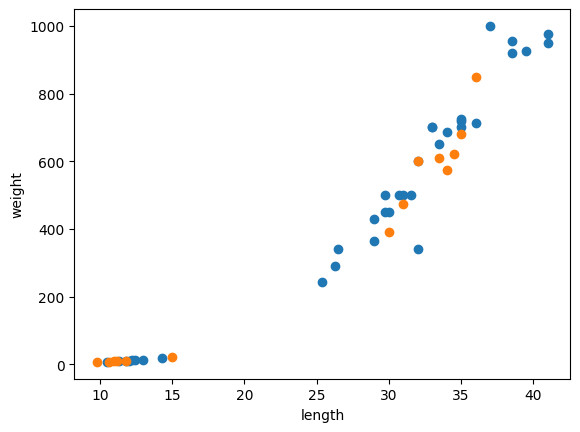

In [86]:
## 새로 생성한 index 기준의 훈련데이터와 평가(측정) 데이터를 산점도 그래프로 출력
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [87]:
## k-최근접 이웃 모델 생성 및 훈련(훈련데이터 저장) 및 평가(측정)
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [88]:
## 평가세트로 구성되어 있는 것을 평가(측정)에 적용
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [89]:
## 정답과 일치하는지 확인하기 위해 정답 값 출력
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# **응용예제**

도미와 다른 물고기 종류에 대해서 훈련세트와 평가세트를 임의로 선택하여 수행하는 개선된 머신러닝 예제를 작성하시오.

In [90]:
## 도미와 농어 데이터 합치기
##  breamlength+perchlength, breamweight+perchweight

fishlength = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 8.4, 13.7, 15, 16.2 ,17.4, 18, 18.7, 19, 19.6, 20, 21, 21, 21, 21.3]
fishweight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 5.9 , 32, 40, 51.5, 70, 100, 78, 80, 85, 85, 110, 115, 125, 130]

## 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트 생성
fishdata = [[l, w] for l, w in zip(fishlength, fishweight)]
## fish_data에 대한 레이블(도미35마리, 농어 14마리) 리스트 생성
fishtarget = [1]*35 + [0]*14
print(fishdata)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [8.4, 5.9], [13.7, 32], [15, 40], [16.2, 51.5], [17.4, 70], [18, 100], [18.7, 78], [19, 80], [19.6, 85], [20, 85], [21, 110], [21, 115], [21, 125], [21.3, 130]]


In [91]:
## 49개 중 36개를 훈련데이터로 14개를 평가 데이터로 분리함
traininput = fishdata[:35]
traintarget = fishtarget[:35]

testinput = fishdata[35:]
testtarget = fishtarget[35:]

In [92]:
## k-최근접 이웃 모델에 대해서 학습은 train_input 데이터로 평가는 test_input으로 수행함
kn = kn.fit(traininput, traintarget)
kn.score(testinput, testtarget)

0.0

In [93]:
## numpy의 array()메소드는 리스트를 배열로 변환함
inputarr = np.array(fishdata)
targetarr = np.array(fishtarget)

In [94]:
print(inputarr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   8.4    5.9]
 [  13.7   32. ]
 [  15.    40. ]
 [  16.2   51.5]
 [  17.4   70. ]
 [  18.   100. ]
 [  18.7   78. ]
 [  19.    80. ]
 [  19.6   85. ]
 [  20.    85. ]
 [  21.   110. ]
 [  21.   115. ]
 [  21.   125. ]
 [  21.3  130. ]]


In [95]:
## numpy 배열의 shape 속성은 배열의 개수와 원소 개수를 출력함
print(inputarr.shape)

(49, 2)


In [96]:
## numy의 무작위 결과를 만드는 함수들은 실행 때마다 다른 결과를 출력함
## 일정한 결과를 위해서 초기 랜덤시드(random seed)를 지정하면 동일한 결과 출력
np.random.seed(42)

## 0~48까지 49개의 인덱스 생성 및 섞기
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [97]:
## 35개의 훈련세트를 새로 생성한 index(순서를 섞은)기준으로 분리
traininput = inputarr[index[:35]]
traintarget = targetarr[index[:35]]

## 35개를 분리하고 남은 나머지는 평가(측정)세트로 설정
testinput = inputarr[index[35:]]
testtarget = targetarr[index[35:]]

print(traininput)
print(traintarget)

[[  32.   340. ]
 [  21.   110. ]
 [  21.   125. ]
 [  20.    85. ]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  18.   100. ]
 [  18.7   78. ]
 [  21.   115. ]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  19.6   85. ]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  13.7   32. ]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


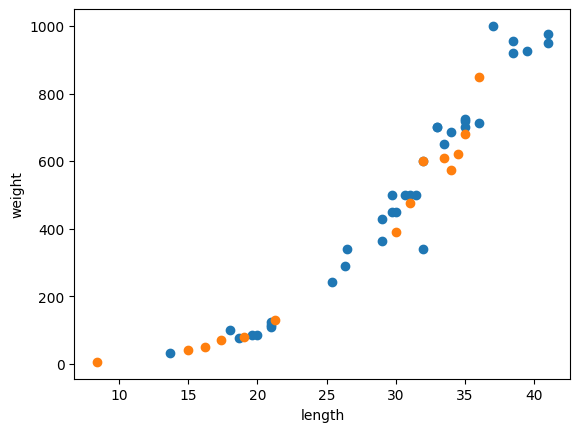

In [98]:
## 새로 생성한 index 기준의 훈련데이터와 평가(측정) 데이터를 산점도 그래프로 출력
import matplotlib.pyplot as plt

plt.scatter(traininput[:, 0], traininput[:, 1])
plt.scatter(testinput[:, 0], testinput[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [99]:
## k-최근접 이웃 모델 생성 및 훈련(훈련데이터 저장) 및 평가(측정)
kn = kn.fit(traininput, traintarget)
kn.score(testinput, testtarget)

1.0

In [100]:
## 평가세트로 구성되어 있는 것을 평가(측정)에 적용
kn.predict(testinput)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [101]:
## 정답과 일치하는지 확인하기 위해 정답 값 출력
print(testtarget)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
